##  Estudo Estatístico sobre Jogadores de Basquete


### Integrantes:
- Gabriel Rocha Porto
- Victor Marques 
- Pedro Ernesto
- Jeová Anderson


### Introdução: 
Este projeto foi desenvolvido como parte da matéria de Introdução a Ciência de Dados. O conjunto de dados que abrange informações sobre jogadores da NBA(liga americana de basquete) no período de 1996 a 2022. O conjunto de dados inclui estatísticas variadas, como média de pontos, taxa de assistências, taxas de rebotes, taxas de bloqueios, entre outros. Utilizamos técnicas de análise de dados e visualização para extrair insights valiosos e responder a perguntas relevantes relacionadas ao desempenho dos jogadores na liga de basquete mais prestigiada do mundo.




### Dados usados:
Utilizamos o dataset [NBA Players](https://www.kaggle.com/datasets/justinas/nba-players-data/) do kaggle, originalmente os dados são de 1996 até 2022. O conjunto de dados inclui uma variedade de informações, como idade, altura, peso e local de nascimento, detalhes biográficos como a equipe jogada, ano e rodada do draft. Além disso, ele tem estatísticas básicas de pontuação como jogos jogados, média de pontos, rebotes, assistências, etc..

In [1]:
#Importando bibliotecas necessarias e escolhendo paleta

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from itertools import combinations
pd.set_option("display.max_columns", 37)
sns.color_palette("Set1")

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [3]:
#Inicializando o Dataset

df = pd.read_csv("all_seasons.csv")
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,66,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,19,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,71,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,52,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


## Sumário

+ player_name: **Nome do jogador**
+ team_abbreviation: **Abreviação do nome do time**
+ age: **Idade do jogador**
+ player_height: **Altura (cm)**
+ player_weight: **Peso (kg)**
+ college: **Universidade frequentada**
+ country: **País de origem**
+ draft_year: **Ano que o jogador foi escolhido no _draft_**
+ draft_round: **Rodada do _draft_ que foi escolhido**
+ draft_number: **Posição no _draft_**
+ gp: **Jogos jogados**
+ pts: **Média de pontos**
+ reb: **Média de rebotes pegos**
+ ast: **Média de assistências**
+ net_rating: **Rendimento da equipe a cada 100 posses**
+ oreb_pct: **Porcentagem de rebotes agressivos que o jogador pegou**
+ dreb_pct: **Porcentagem de rebotes defensivos que o jogador pegou**
+ usg_pct: **Porcentagem de jogadas em equipe feitas pelo jogador**
+ ts_pct: **Medida de eficiência no arremesso**
+ ast_pct: **Porcentagem de assistências que resultaram em cesta**
+ season: **Temporada da NBA**

## Pré Processamento:
### Limpeza dos dados:

- **Retirada a coluna "Unnamed: 0"**

In [12]:
df = df.drop(columns="Unnamed: 0")

- **Arredendondo o número de casas decimais do peso dos jogadores para .2.**

In [14]:
df['player_weight'] = df['player_weight'].apply(round, ndigits=2)


- **Dataset após limpeza**:

In [16]:
df.head(5)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.80,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.18,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.42,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.06,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.75,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


## Perguntas:

### Jogadores com posições melhores no draft tiveram uma maior média de pontos? ###

- **Plotando Grafico**

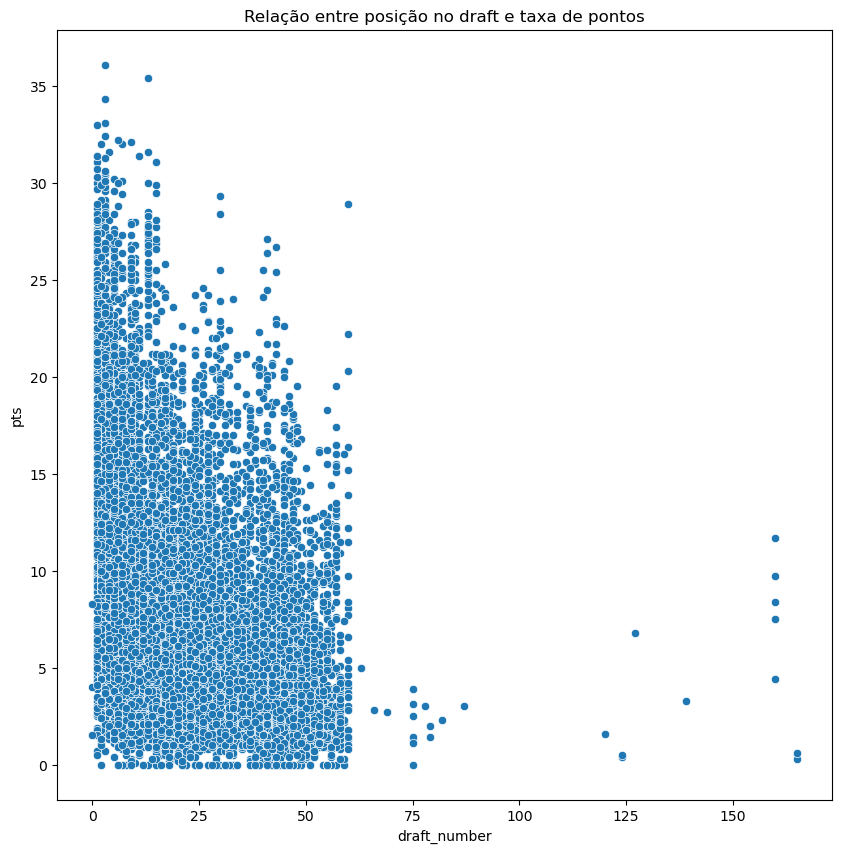

In [60]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="draft_number", y="pts")
plt.title("Relação entre posição no draft e taxa de pontos")
plt.show()

- **Transformando o tipo de "Draft_number" de string para inteiro.**

In [22]:
df['draft_number'] = pd.to_numeric(df['draft_number'], errors='coerce')

- **Facilitando a visualização do grafico utilizando a media de cada posição do Draft_Number**

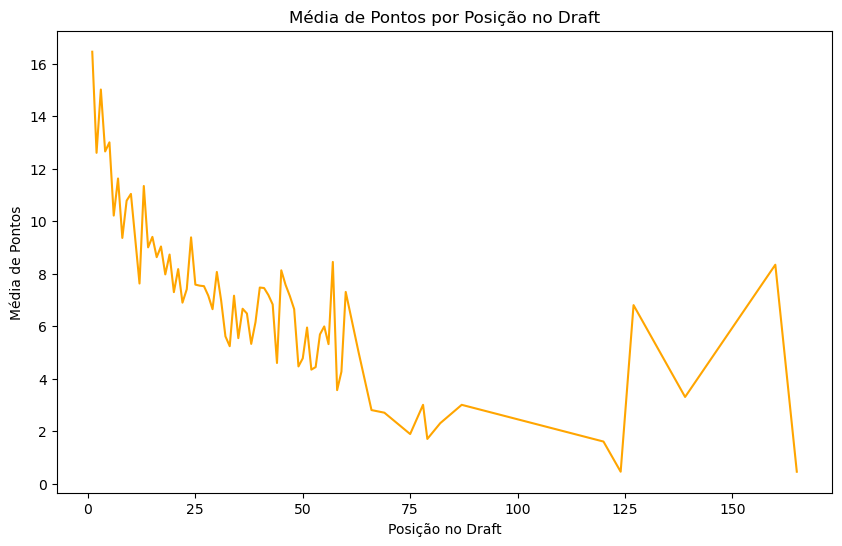

In [94]:
# Filtrando os dados para excluir a posição 0 no draft
df_filtered = df[df['draft_number'] != 0]

# Agrupando os dados pela posição no draft e calculando a média de pontos para cada posição
grouped = df_filtered.groupby('draft_number')['pts'].mean()

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, color='orange')
plt.xlabel('Posição no Draft')
plt.ylabel('Média de Pontos')
plt.title('Média de Pontos por Posição no Draft')
plt.show()

- **Fazendo correlação entre draft_number e a media de pontos de cada posição no draft_number**

In [92]:
# Primeiro, crie uma nova DataFrame com a média de 'pts' para cada 'draft_number'
df_mean_pts = df_filtered.groupby('draft_number')['pts'].mean().reset_index()

# Em seguida, calcule a correlação entre 'draft_number' e 'pts'
correlation = df_mean_pts['draft_number'].corr(df_mean_pts['pts'])
correlation

-0.7128991726223864

### Jogadores acima de 35 anos jogam menos partidas que os mais novos? ### 

- **Separando entre jogadores abaixo de 35 anos e jogadores com idades maiores ou iguais a 35 anos**

In [33]:
older_players = df[df['age'] >= 35]
younger_players = df[df['age'] < 35]

avg_gp_older = older_players['gp'].mean()
avg_gp_younger = younger_players['gp'].mean()

print(f"Média de partidas jogadas por jogadores com 35 anos ou mais: {avg_gp_older}")
print(f"Média de partidas jogadas por jogadores com menos de 35 anos: {avg_gp_younger}")


Média de partidas jogadas por jogadores com 35 anos ou mais: 50.53544303797468
Média de partidas jogadas por jogadores com menos de 35 anos: 51.194707151153146


- **Plotando o grafico** 

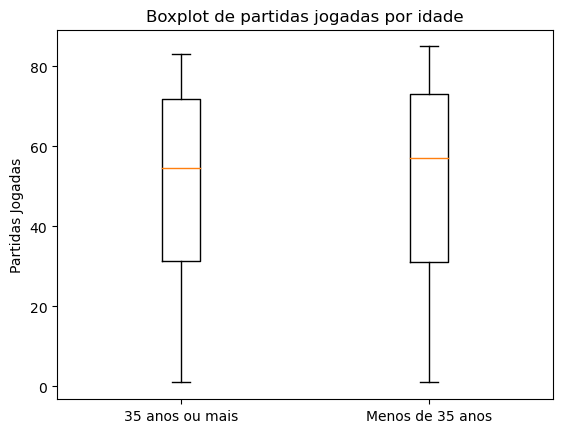

In [96]:
plt.boxplot([older_players['gp'], younger_players['gp']], labels=['35 anos ou mais', 'Menos de 35 anos'])
plt.title('Boxplot de partidas jogadas por idade')
plt.ylabel('Partidas Jogadas')
plt.show()

### Qual time possuí os jogadores que mais marcaram? ##

- **Agrupando coluna pela abreviação do time e fazendo a media de cada time**

In [97]:
dfhandle = df.groupby("team_abbreviation")["pts"].mean().to_dict()
df['team_pts_mean'] = df['team_abbreviation'].map(dfhandle)
df['team_pts_mean'] = df['team_pts_mean'].apply(round, ndigits=2)
dfhandle

{'ATL': 7.860136674259681,
 'BKN': 8.564,
 'BOS': 8.198823529411765,
 'CHA': 8.123606557377048,
 'CHH': 7.883146067415731,
 'CHI': 8.141134751773048,
 'CLE': 7.903111111111111,
 'DAL': 8.12099322799097,
 'DEN': 8.434813084112148,
 'DET': 7.991408114558473,
 'GSW': 8.677230046948356,
 'HOU': 8.465357967667437,
 'IND': 8.320794392523364,
 'LAC': 8.400452488687783,
 'LAL': 8.628671328671329,
 'MEM': 8.017837837837838,
 'MIA': 8.24920993227991,
 'MIL': 8.44496487119438,
 'MIN': 8.414388489208633,
 'NJN': 7.796498054474708,
 'NOH': 7.853146853146853,
 'NOK': 8.290625,
 'NOP': 9.068000000000001,
 'NYK': 8.22488262910798,
 'OKC': 8.380392156862746,
 'ORL': 8.065654205607476,
 'PHI': 8.034931506849315,
 'PHX': 8.600722891566265,
 'POR': 8.10911214953271,
 'SAC': 8.496411483253588,
 'SAS': 7.90184331797235,
 'SEA': 7.789560439560439,
 'TOR': 7.904708520179372,
 'UTA': 7.953956834532375,
 'VAN': 7.540277777777778,
 'WAS': 8.168099547511313}

- **Plotando o grafico**

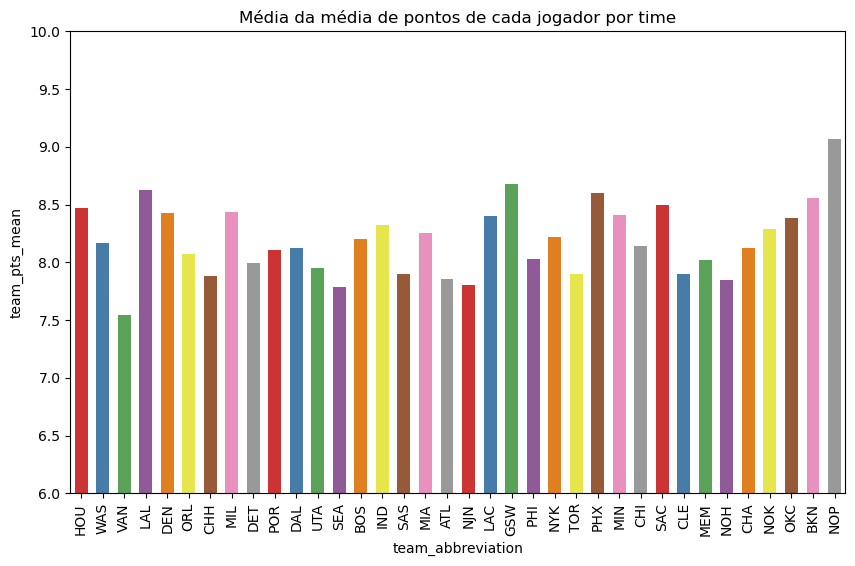

In [101]:
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras
sns.barplot(df, x="team_abbreviation", y="team_pts_mean",  palette='Set1', dodge=True, width=0.6)
plt.ylim(6, 10)
plt.xticks(rotation=90)
plt.title("Média da média de pontos de cada jogador por time")
plt.show()

## Conclusão: ##